<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
os.listdir('input/genres/') 

['Acrocephalus',
 'Bubo',
 'Caprimulgus',
 'Emberiza',
 'Ficedula',
 'Glaucidium',
 'Hippolais']

In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [6]:
file = open('NumericalAudioData.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'Acrocephalus Bubo Caprimulgus Emberiza Ficedula Glaucidium Hippolais'.split()
for g in genres:
    for filename in os.listdir(f'input/genres/{g}'):
        songname = f'input/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('NumericalAudioData.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [7]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Acrocephalus-arundinaceus-131536.wav,0.502487,0.020214,3247.210518,2131.072584,5428.100510,0.244303,-348.715851,37.231014,-37.123840,...,1.361809,-3.169950,3.511309,4.622707,1.945550,-6.274346,-0.371448,1.310096,-0.434590,Acrocephalus
1,Acrocephalus-arundinaceus-136005.wav,0.465675,0.013826,2510.468018,1802.112012,3910.201356,0.189766,-372.900330,72.658958,-78.646698,...,-9.036041,-17.030788,-3.398880,-10.053909,-3.962412,-9.786374,-4.628410,-2.132346,-4.459480,Acrocephalus
2,Acrocephalus-arundinaceus-178787.wav,0.426505,0.050428,3311.704641,2104.188482,5131.760636,0.251065,-223.171265,20.798008,-26.720020,...,9.769043,-4.884435,-0.400210,1.162726,7.050718,-0.400465,4.228247,0.023146,1.278777,Acrocephalus
3,Acrocephalus-arundinaceus-178789.wav,0.356706,0.048756,3560.666770,1960.960602,5152.952174,0.281322,-257.395325,-4.162464,-45.558880,...,17.471916,1.835642,8.779262,10.945198,11.189402,-0.638086,0.964755,-2.314363,3.889105,Acrocephalus
4,Acrocephalus-arundinaceus-178791.wav,0.412822,0.030976,3508.061754,2116.774723,5292.634663,0.262295,-291.118073,8.163916,-33.756840,...,15.906043,3.138286,8.190464,6.321323,3.740094,0.041233,7.325233,-1.476730,2.038208,Acrocephalus


In [8]:
print(data.shape)

(212, 28)


In [9]:
data["label"].value_counts()

Acrocephalus    32
Bubo            30
Caprimulgus     30
Emberiza        30
Ficedula        30
Glaucidium      30
Hippolais       30
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

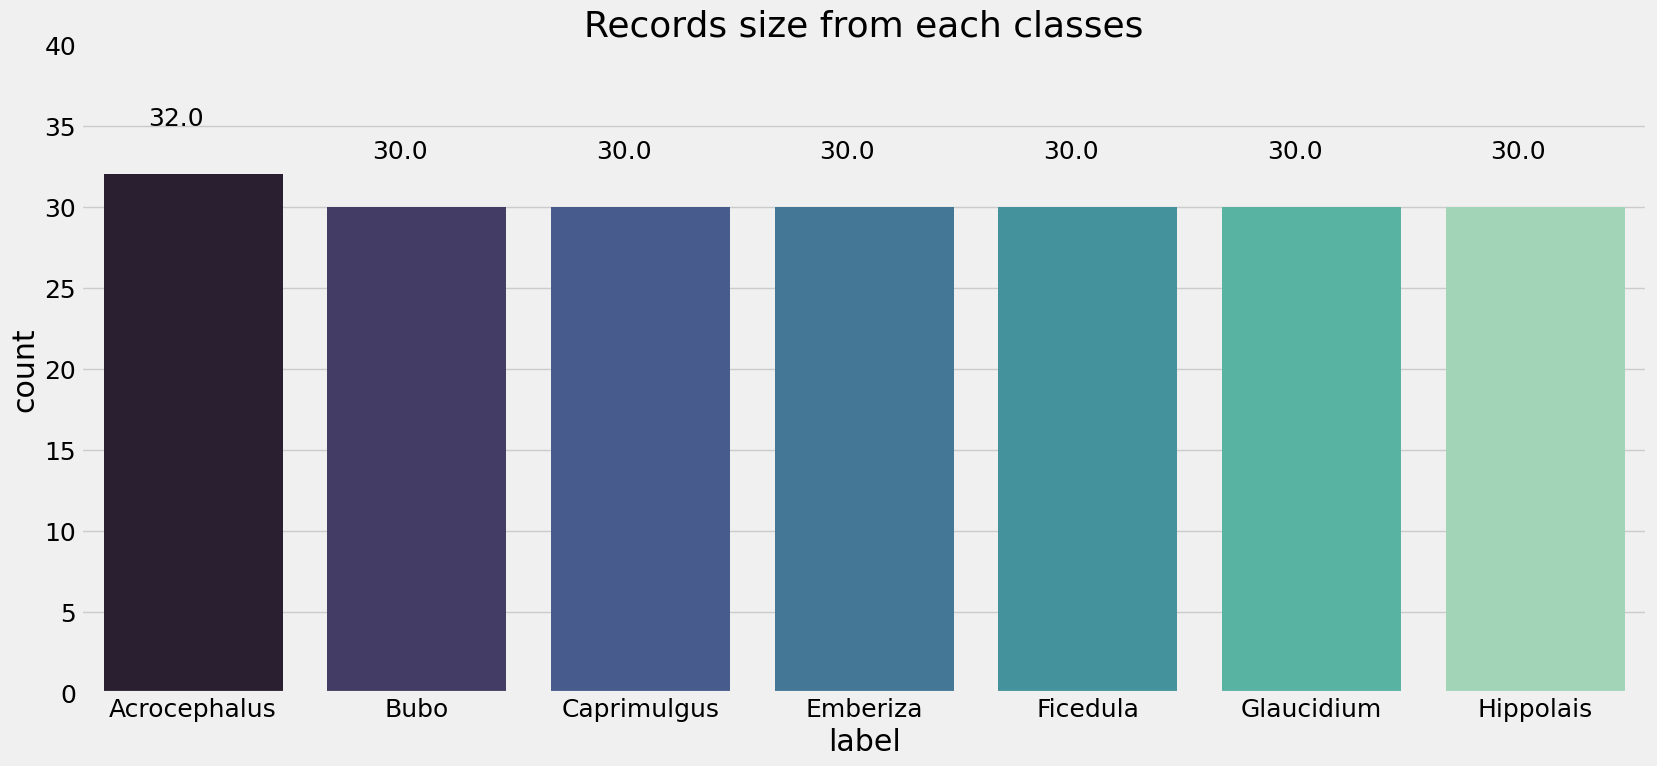

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,40)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

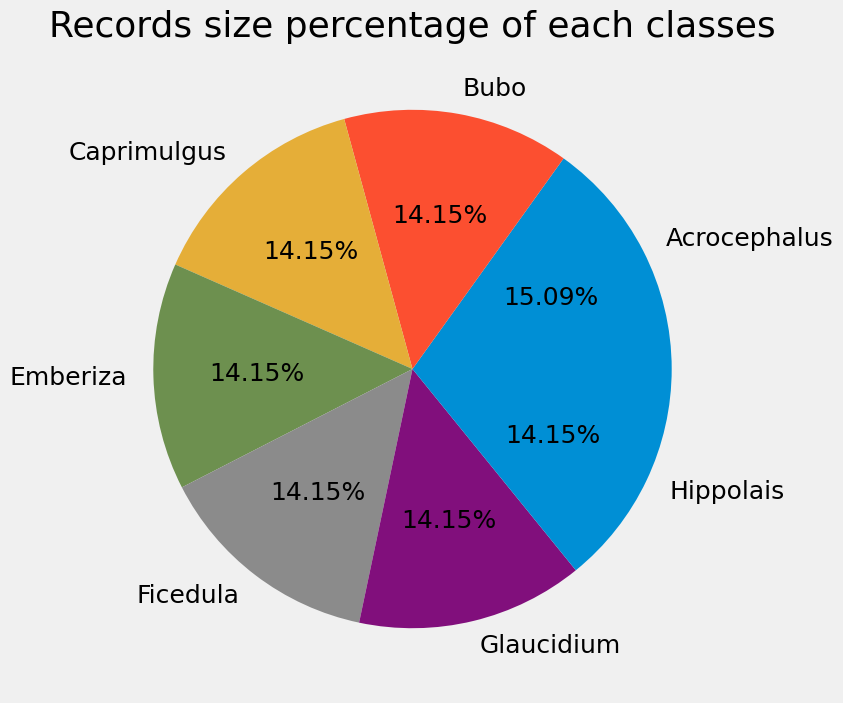

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(212, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         212 non-null    float64
 1   rmse                212 non-null    float64
 2   spectral_centroid   212 non-null    float64
 3   spectral_bandwidth  212 non-null    float64
 4   rolloff             212 non-null    float64
 5   zero_crossing_rate  212 non-null    float64
 6   mfcc1               212 non-null    float64
 7   mfcc2               212 non-null    float64
 8   mfcc3               212 non-null    float64
 9   mfcc4               212 non-null    float64
 10  mfcc5               212 non-null    float64
 11  mfcc6               212 non-null    float64
 12  mfcc7               212 non-null    float64
 13  mfcc8               212 non-null    float64
 14  mfcc9               212 non-null    float64
 15  mfcc10              212 non-null    float64
 16  mfcc11  

In [15]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.502487,0.020214,3247.210518,2131.072584,5428.100510,0.244303,-348.715851,37.231014,-37.123840,50.515919,...,1.361809,-3.169950,3.511309,4.622707,1.945550,-6.274346,-0.371448,1.310096,-0.434590,Acrocephalus
1,0.465675,0.013826,2510.468018,1802.112012,3910.201356,0.189766,-372.900330,72.658958,-78.646698,-0.896485,...,-9.036041,-17.030788,-3.398880,-10.053909,-3.962412,-9.786374,-4.628410,-2.132346,-4.459480,Acrocephalus
2,0.426505,0.050428,3311.704641,2104.188482,5131.760636,0.251065,-223.171265,20.798008,-26.720020,83.485634,...,9.769043,-4.884435,-0.400210,1.162726,7.050718,-0.400465,4.228247,0.023146,1.278777,Acrocephalus
3,0.356706,0.048756,3560.666770,1960.960602,5152.952174,0.281322,-257.395325,-4.162464,-45.558880,69.502159,...,17.471916,1.835642,8.779262,10.945198,11.189402,-0.638086,0.964755,-2.314363,3.889105,Acrocephalus
4,0.412822,0.030976,3508.061754,2116.774723,5292.634663,0.262295,-291.118073,8.163916,-33.756840,70.411072,...,15.906043,3.138286,8.190464,6.321323,3.740094,0.041233,7.325233,-1.476730,2.038208,Acrocephalus


In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['Acrocephalus', 'Bubo', 'Caprimulgus', 'Emberiza', 'Ficedula', 'Glaucidium', 'Hippolais']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=1000)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.722936,0.021798,794.148679,2005.056180,1149.326384,0.006063,-523.021606,96.021828,28.938976,4.156510,...,11.821346,9.127307,9.139157,7.235141,9.857149,10.551424,12.680090,9.374465,8.711125,Bubo
1,0.434265,0.027455,1605.602494,1763.920672,2586.234361,0.105300,-249.217926,142.014587,-29.506536,-1.024494,...,-2.961978,-5.583447,1.610044,-2.823997,3.676330,1.937744,4.090701,-3.840628,1.538220,Glaucidium
2,0.546705,0.001504,3189.692904,2567.905422,6185.470931,0.216437,-606.017578,49.503742,-39.016018,-7.003002,...,-7.704953,-4.141870,-1.373427,-3.316021,1.155267,-1.960585,-1.417060,-0.980671,3.925556,Caprimulgus
3,0.603235,0.014350,3239.336995,2574.607907,6071.704952,0.152934,-503.217499,15.185453,27.841537,51.162598,...,10.436206,4.706431,12.931949,6.081818,7.220159,8.692315,5.665415,6.334022,6.492737,Emberiza
4,0.238456,0.059483,4046.150484,2022.568553,5540.591497,0.347315,-260.582275,11.859225,-26.538628,24.926964,...,25.453651,-9.930112,16.766014,-6.403366,-3.036759,10.742436,-2.654274,4.750556,9.805835,Caprimulgus


In [18]:
df.shape

(7000, 27)

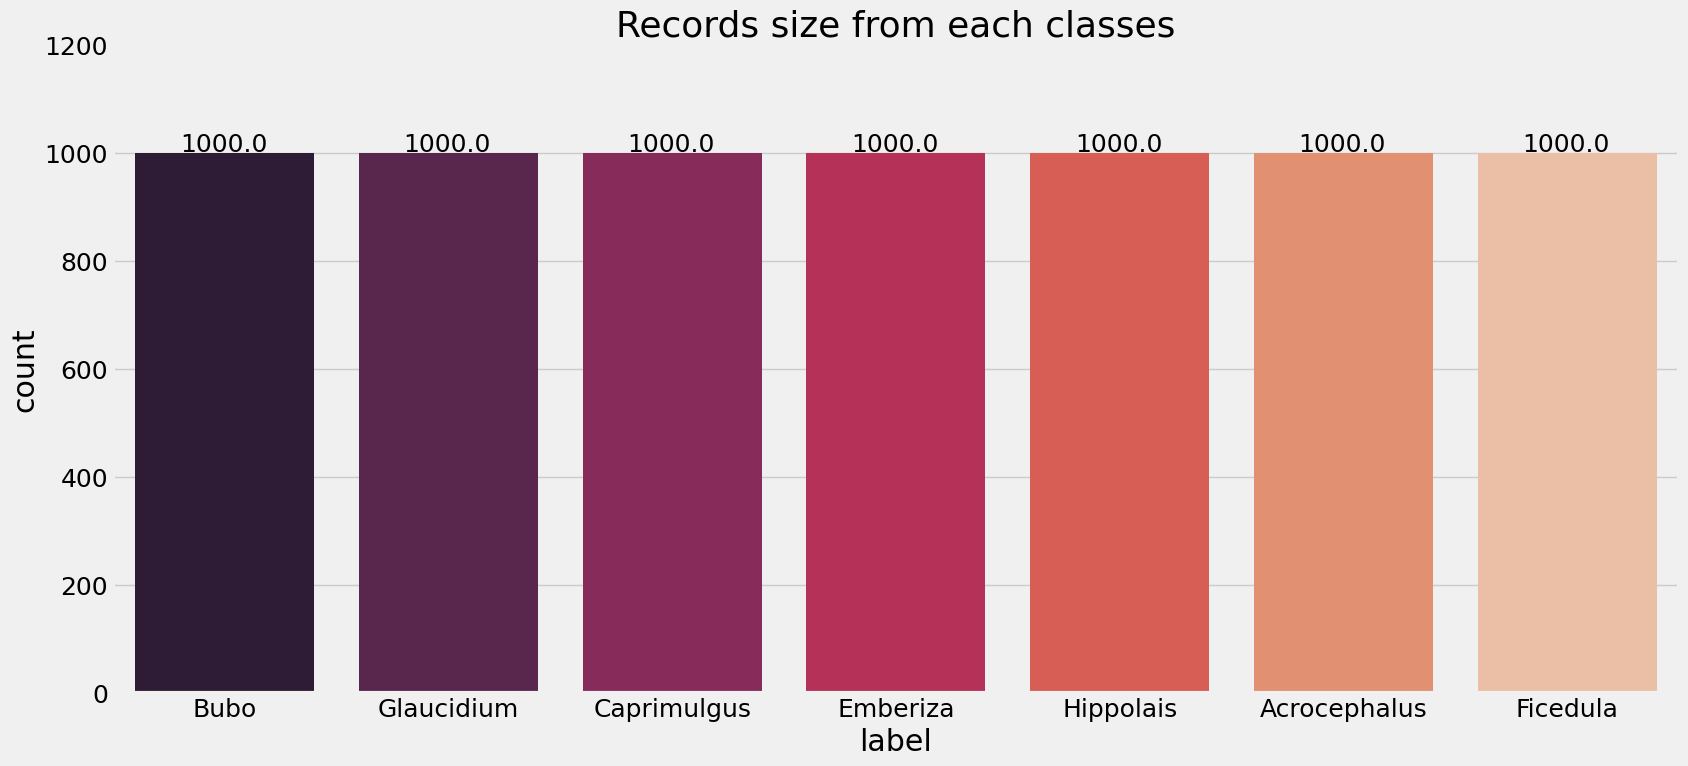

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,1200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

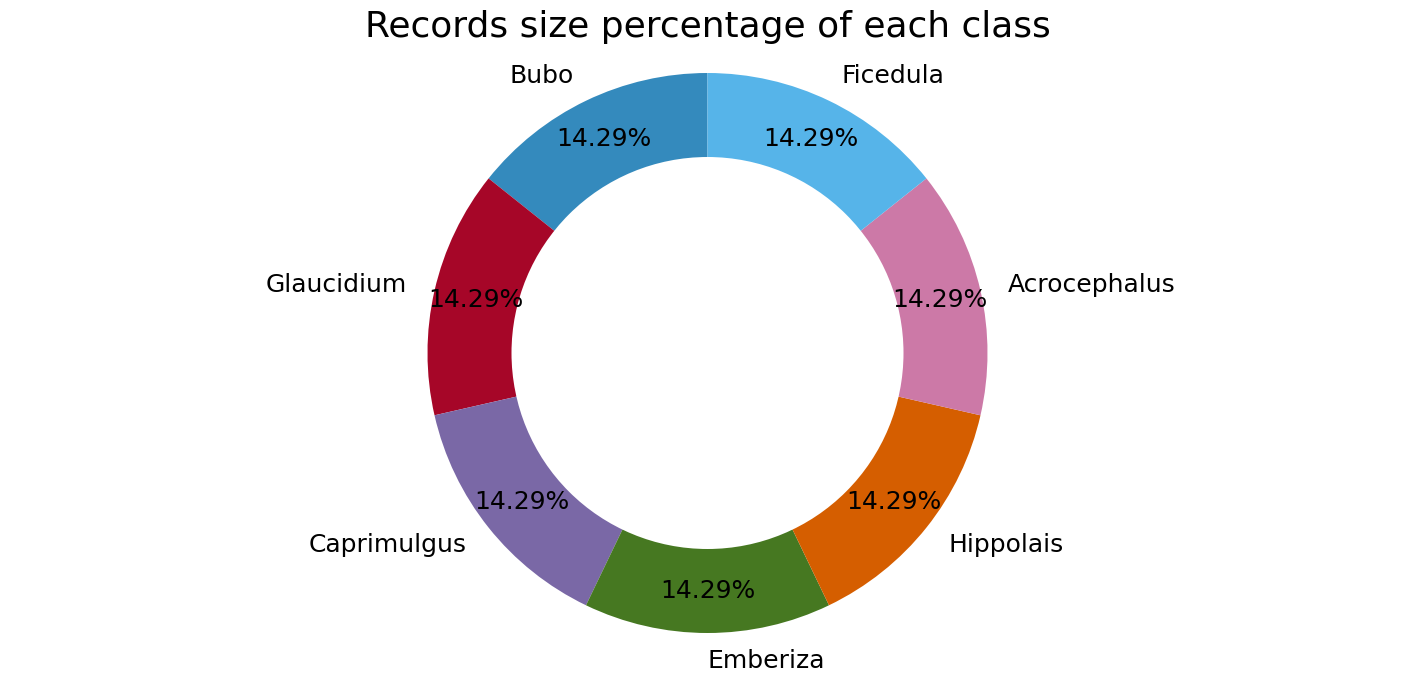

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 18
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.722936,0.021798,794.148679,2005.056180,1149.326384,0.006063,-523.021606,96.021828,28.938976,4.156510,...,9.997539,11.821346,9.127307,9.139157,7.235141,9.857149,10.551424,12.680090,9.374465,8.711125
1,0.434265,0.027455,1605.602494,1763.920672,2586.234361,0.105300,-249.217926,142.014587,-29.506536,-1.024494,...,-9.403533,-2.961978,-5.583447,1.610044,-2.823997,3.676330,1.937744,4.090701,-3.840628,1.538220
2,0.546705,0.001504,3189.692904,2567.905422,6185.470931,0.216437,-606.017578,49.503742,-39.016018,-7.003002,...,-13.332572,-7.704953,-4.141870,-1.373427,-3.316021,1.155267,-1.960585,-1.417060,-0.980671,3.925556
3,0.603235,0.014350,3239.336995,2574.607907,6071.704952,0.152934,-503.217499,15.185453,27.841537,51.162598,...,8.063990,10.436206,4.706431,12.931949,6.081818,7.220159,8.692315,5.665415,6.334022,6.492737
4,0.238456,0.059483,4046.150484,2022.568553,5540.591497,0.347315,-260.582275,11.859225,-26.538628,24.926964,...,-4.488057,25.453651,-9.930112,16.766014,-6.403366,-3.036759,10.742436,-2.654274,4.750556,9.805835


In [22]:
y = df[["label"]]
y.head()

,label
0,Bubo
1,Glaucidium
2,Caprimulgus
3,Emberiza
4,Caprimulgus


In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2.008381,0.080323,-2.107460,-0.264183,-2.267912,-1.734374,-1.026352,0.906626,1.145668,-0.430052,...,1.072686,1.103247,0.775413,0.943059,1.206089,1.850796,2.388758,2.092188,1.541284,Bubo
1,-0.303983,0.390864,-1.279069,-0.732675,-1.400606,-0.810244,1.632754,1.764495,-0.078015,-0.594793,...,-0.807172,-0.788077,-0.293049,-0.617683,-0.007277,0.195814,0.433997,-0.728289,-0.459676,Glaucidium
2,0.596702,-1.033852,0.338086,0.829355,0.771865,0.224701,-1.832386,0.038960,-0.277116,-0.784892,...,-1.410292,-0.602737,-0.716435,-0.694024,-0.502191,-0.553188,-0.819451,-0.117893,0.206297,Caprimulgus
3,1.049534,-0.328583,0.388766,0.842377,0.703196,-0.366661,-0.834020,-0.601154,1.122691,1.064603,...,0.896550,0.534866,1.313651,0.764113,0.688418,1.493598,0.792368,1.443271,0.922440,Emberiza
4,-1.872488,2.149282,1.212420,-0.230158,0.382621,1.443480,1.522386,-0.663195,-0.015875,0.230387,...,2.806179,-1.346916,1.857746,-1.173046,-1.325134,1.887496,-1.101015,1.105314,1.846665,Caprimulgus


In [25]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         7000 non-null   float64
 1   rmse                7000 non-null   float64
 2   spectral_centroid   7000 non-null   float64
 3   spectral_bandwidth  7000 non-null   float64
 4   rolloff             7000 non-null   float64
 5   zero_crossing_rate  7000 non-null   float64
 6   mfcc1               7000 non-null   float64
 7   mfcc2               7000 non-null   float64
 8   mfcc3               7000 non-null   float64
 9   mfcc4               7000 non-null   float64
 10  mfcc5               7000 non-null   float64
 11  mfcc6               7000 non-null   float64
 12  mfcc7               7000 non-null   float64
 13  mfcc8               7000 non-null   float64
 14  mfcc9               7000 non-null   float64
 15  mfcc10              7000 non-null   float64
 16  mfcc11

In [27]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

{'Acrocephalus': 0, 'Bubo': 1, 'Caprimulgus': 2, 'Emberiza': 3, 'Ficedula': 4, 'Glaucidium': 5, 'Hippolais': 6}


In [28]:
df['label'] = df['label'].map(class_dict)
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2.008381,0.080323,-2.107460,-0.264183,-2.267912,-1.734374,-1.026352,0.906626,1.145668,-0.430052,...,1.072686,1.103247,0.775413,0.943059,1.206089,1.850796,2.388758,2.092188,1.541284,1
1,-0.303983,0.390864,-1.279069,-0.732675,-1.400606,-0.810244,1.632754,1.764495,-0.078015,-0.594793,...,-0.807172,-0.788077,-0.293049,-0.617683,-0.007277,0.195814,0.433997,-0.728289,-0.459676,5
2,0.596702,-1.033852,0.338086,0.829355,0.771865,0.224701,-1.832386,0.038960,-0.277116,-0.784892,...,-1.410292,-0.602737,-0.716435,-0.694024,-0.502191,-0.553188,-0.819451,-0.117893,0.206297,2
3,1.049534,-0.328583,0.388766,0.842377,0.703196,-0.366661,-0.834020,-0.601154,1.122691,1.064603,...,0.896550,0.534866,1.313651,0.764113,0.688418,1.493598,0.792368,1.443271,0.922440,3
4,-1.872488,2.149282,1.212420,-0.230158,0.382621,1.443480,1.522386,-0.663195,-0.015875,0.230387,...,2.806179,-1.346916,1.857746,-1.173046,-1.325134,1.887496,-1.101015,1.105314,1.846665,2


In [29]:
X = df.drop(labels="label", axis=1)
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,2.008381,0.080323,-2.107460,-0.264183,-2.267912,-1.734374,-1.026352,0.906626,1.145668,-0.430052,...,1.254100,1.072686,1.103247,0.775413,0.943059,1.206089,1.850796,2.388758,2.092188,1.541284
1,-0.303983,0.390864,-1.279069,-0.732675,-1.400606,-0.810244,1.632754,1.764495,-0.078015,-0.594793,...,-0.792825,-0.807172,-0.788077,-0.293049,-0.617683,-0.007277,0.195814,0.433997,-0.728289,-0.459676
2,0.596702,-1.033852,0.338086,0.829355,0.771865,0.224701,-1.832386,0.038960,-0.277116,-0.784892,...,-1.207361,-1.410292,-0.602737,-0.716435,-0.694024,-0.502191,-0.553188,-0.819451,-0.117893,0.206297
3,1.049534,-0.328583,0.388766,0.842377,0.703196,-0.366661,-0.834020,-0.601154,1.122691,1.064603,...,1.050099,0.896550,0.534866,1.313651,0.764113,0.688418,1.493598,0.792368,1.443271,0.922440
4,-1.872488,2.149282,1.212420,-0.230158,0.382621,1.443480,1.522386,-0.663195,-0.015875,0.230387,...,-0.274214,2.806179,-1.346916,1.857746,-1.173046,-1.325134,1.887496,-1.101015,1.105314,1.846665


In [30]:
y = df[["label"]]
y.head()

,label
0,1
1,5
2,2
3,3
4,2


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5600, 26) (1400, 26) (5600, 1) (1400, 1)


In [32]:
X_train.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
2914,-0.372756,-0.543869,1.302728,0.067092,0.920257,1.261317,-1.386024,-1.032815,-0.223864,-0.110091,...,0.980633,0.239121,-0.496122,-1.356498,0.312957,-0.559655,-0.072883,0.654990,-1.166787,-2.118029
5141,-1.173481,-0.213534,-1.030603,-1.325649,-1.642051,-0.559147,0.423495,1.366364,-0.825694,-1.198841,...,-0.624126,0.319594,2.027139,-0.618722,-1.074178,-0.702869,-0.804753,-0.837475,0.538313,0.824898
3024,0.850867,0.112663,0.380612,0.619809,0.461811,-0.299174,-0.743422,-0.493011,1.331911,1.051523,...,0.855095,0.214359,0.637240,1.029315,1.183577,0.978752,2.448636,1.080352,1.190555,0.922496
5710,-0.372756,-0.543869,1.302728,0.067092,0.920257,1.261317,-1.386024,-1.032815,-0.223864,-0.110091,...,0.980633,0.239121,-0.496122,-1.356498,0.312957,-0.559655,-0.072883,0.654990,-1.166787,-2.118029
2359,-0.785378,0.314123,0.352597,-1.139567,-0.313437,0.605565,0.427977,-1.006821,-2.195627,-1.095751,...,0.417195,1.200423,1.102312,1.725281,0.809728,0.609884,-0.080328,0.123338,-0.221907,-0.132172


In [33]:
y_train.head()

,label
2914,5
5141,2
3024,3
5710,5
2359,6


In [34]:
X_test.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
4464,-0.056846,-0.794024,0.403742,-0.284968,0.090574,0.736535,0.307581,0.092377,-0.210149,1.347310,...,0.304191,0.344333,-0.515853,0.139023,0.048028,-0.244780,-0.351775,0.773204,-0.513717,0.023035
686,-0.711537,-0.045647,0.044174,-0.469342,-0.230152,0.393265,0.751281,0.080383,-0.782996,0.606401,...,0.235157,-0.224261,-0.650807,0.009023,-0.055413,-1.230781,-0.406870,0.059035,0.068658,-0.952913
5311,-1.343429,1.094000,0.706484,-0.836035,0.138902,0.833015,-0.647029,-1.582446,-0.686164,0.579270,...,0.384483,0.184683,-0.783897,-0.479330,0.358995,0.069961,-1.185724,-0.430986,1.158600,-0.717267
3576,-0.380915,-0.099987,1.165805,-0.267246,0.565624,1.488792,1.038072,-0.785491,-0.355600,0.449205,...,-0.489533,-0.457741,-0.360075,-0.131068,-0.626292,-0.873494,-0.266419,0.414807,-0.901667,0.114427
4820,-0.599442,0.228187,0.076578,-0.641486,-0.281427,-0.039429,0.443120,-0.574839,-0.801985,1.770113,...,0.820322,0.564400,0.809196,0.818372,1.755524,1.209864,0.276635,1.657913,0.726034,0.224444


In [35]:
y_test.head()

,label
4464,0
686,0
5311,0
3576,6
4820,0


In [37]:
X_train.to_csv("splitted_data/X_train.csv", index=False)
X_test.to_csv("splitted_data/X_test.csv", index=False)
y_train.to_csv("splitted_data/y_train.csv", index=False)
y_test.to_csv("splitted_data/y_test.csv", index=False)

---